### 딥러닝 모형 실습 - Regression 

In [13]:
import tensorflow as tf
import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense
import keras

In [2]:
featureData = pd.read_csv('./data/feature_regression_example.csv')

In [3]:
sortKey = ["REGIONID","PRODUCTGROUP","PRODUCT","ITEM","YEARWEEK"]
featureData = featureData.sort_values(sortKey)
featureData.head()

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3,1209,N,4,Y,0.208155
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,2015,4,1810,Y,2,Y,0.208155
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,2015,5,1773,N,4,Y,0.208155


In [4]:
##숫자형 컬럼 생성
featureData["HOLIDAY_YN"] = np.where(featureData.HOLIDAY=="Y",1,0)
featureData["PROMOTION_YN"] = np.where(featureData.PROMOTION == "Y",1,0)

In [5]:
##특정 주차 기준 분리
predictStd = 201630
train_dataset = featureData.query('YEARWEEK <= @predictStd')
test_dataset = featureData.query('YEARWEEK < @predictStd')

##인덱스 초기화
train_dataset = train_dataset.reset_index(drop=True)
test_dataset = test_dataset.reset_index(drop=True)

##답지 별도 분리
train_labels = train_dataset["QTY"]
test_labels = test_dataset["QTY"]

In [6]:
corr_result = train_dataset.corr()

#상관관계 계수 비율 선정
featuresStd = 0.6

features_key = corr_result[(abs(corr_result.QTY) >= 0.5) & (corr_result.QTY != 1)].index.tolist()
label_key = ['QTY']
full_key = features_key + label_key

In [7]:
##seed값 설정
seed = 20
np.random.seed(seed)
tf.set_random_seed(seed)

In [21]:
##뉴런 확인 - 레이어 방식 
##모델 생성

#Feature 컬럼의 개수

##normed_train_data 질문하기!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
n_cols = train_dataset.shape[1]

model = Sequential()
model.add(Dense(64,activation='relu',input_shape=(n_cols,)))
model.add(Dense(64,activation='relu'))
model.add(Dense(1))

model.compile(loss='categorical_crossentropy',
              optimizer='Adam',metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 64)                960       
_________________________________________________________________
dense_11 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 65        
Total params: 5,185
Trainable params: 5,185
Non-trainable params: 0
_________________________________________________________________


In [22]:
##page 81
##모델 학습 및 검증
from keras.callbacks import EarlyStopping
##에러율 정지 단 옵션 유지
early_stopping_monitor = EarlyStopping(patience=2000)
EPOCHS = 2000

##모델 훈련
history = model.fit(train_dataset,train_labels,validation_split=0.2,epochs=EPOCHS,callbacks=[early_stopping_monitor])

loss,mae,mse = model.evaluate(train_dataset,test_labels,verbose=0)

ValueError: You are passing a target array of shape (83, 1) while using as loss `categorical_crossentropy`. `categorical_crossentropy` expects targets to be binary matrices (1s and 0s) of shape (samples, classes). If your targets are integer classes, you can convert them to the expected format via:
```
from keras.utils import to_categorical
y_binary = to_categorical(y_int)
```

Alternatively, you can use the loss function `sparse_categorical_crossentropy` instead, which does expect integer targets.

### 딥러닝 모형 실습 - classification

In [23]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy
import tensorflow as tf
%matplotlib inline

0          setosa
50     versicolor
100     virginica
Name: species, dtype: object


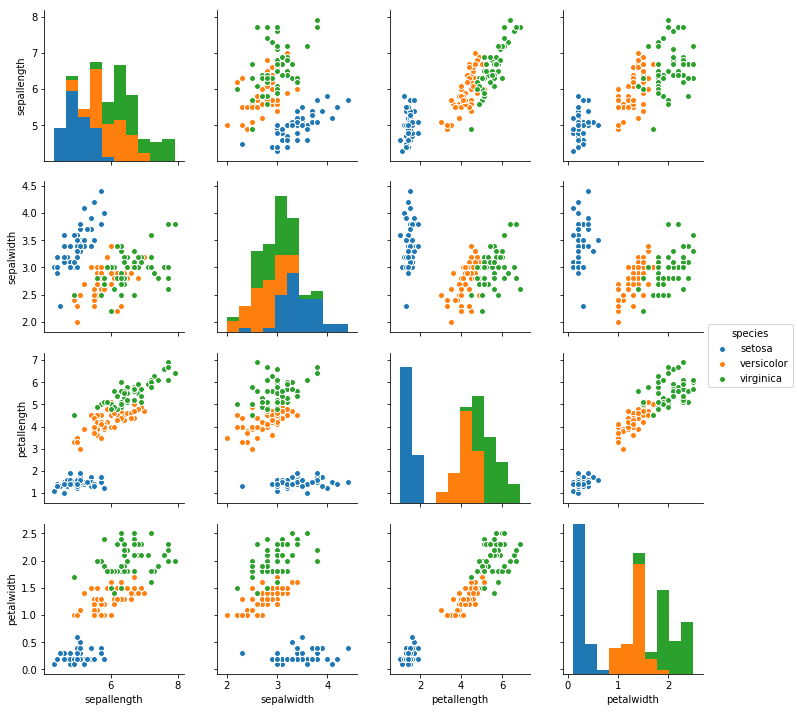

In [31]:
## seed값 설정
seed = 21
numpy.random.seed(seed)
tf.set_random_seed(seed)

##데이터 입력
df = pd.read_csv('./data/IRIS.csv')
df.columns = df.columns.str.lower()
print(df["species"].drop_duplicates())

##그래프로 확인
sns.pairplot(df,hue='species');
plt.show()

In [45]:
##데이터 분리
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

encoder = LabelEncoder()
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=1)
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((120, 4), (30, 4), (120, 3), (30, 3))

In [47]:
##모델 생성
model = Sequential()
model.add(Dense(64,input_shape=(4,),activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 64)                320       
_________________________________________________________________
dense_17 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_18 (Dense)             (None, 3)                 195       
Total params: 4,675
Trainable params: 4,675
Non-trainable params: 0
_________________________________________________________________


In [48]:
##에러율 정지 단 옵션 유지
early_stopping_monitor = EarlyStopping(patience=2)
#train model
hist = model.fit(X_train,y_train,epochs=50,validation_split=0.2,callbacks=[early_stopping_monitor])

Train on 96 samples, validate on 24 samples
Epoch 1/50
96/96 [==============================] - 0s 4ms/step - loss: 1.0775 - acc: 0.3958 - val_loss: 1.1220 - val_acc: 0.2500
Epoch 2/50
96/96 [==============================] - 0s 42us/step - loss: 0.9987 - acc: 0.3958 - val_loss: 1.0663 - val_acc: 0.2917
Epoch 3/50
96/96 [==============================] - 0s 63us/step - loss: 0.9406 - acc: 0.5625 - val_loss: 1.0004 - val_acc: 0.5417
Epoch 4/50
96/96 [==============================] - 0s 52us/step - loss: 0.8896 - acc: 0.7292 - val_loss: 0.9818 - val_acc: 0.5417
Epoch 5/50
96/96 [==============================] - 0s 73us/step - loss: 0.8317 - acc: 0.7292 - val_loss: 0.9325 - val_acc: 0.5417
Epoch 6/50
96/96 [==============================] - 0s 52us/step - loss: 0.7848 - acc: 0.7292 - val_loss: 0.8728 - val_acc: 0.5417
Epoch 7/50
96/96 [==============================] - 0s 52us/step - loss: 0.7393 - acc: 0.7292 - val_loss: 0.8377 - val_acc: 0.5417
Epoch 8/50
96/96 [======================

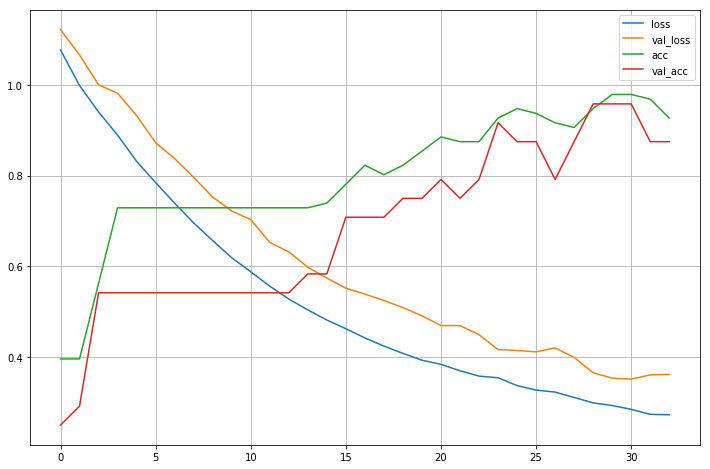

In [51]:
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.legend(['loss','val_loss','acc','val_acc'])
plt.grid()
plt.show()

In [55]:
loss,accuracy = model.evaluate(X_test,y_test)
print("Accuracy = {:.2f}".format(accuracy))

30/30 [==============================] - 0s 33us/step
Accuracy = 0.73


### 시계열 모형 실습 - Arima Model

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa import api 
from statsmodels.tsa.api import ExponentialSmoothing ,SimpleExpSmoothing 
from statsmodels.tsa.arima_model import ARIMA
import scipy
from scipy.optimize import minimize 
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [21]:
selloutData = pd.read_csv('./data/sample_kopo.csv')
selloutData.columns = selloutData.columns.str.upper()
selloutData.head()

sortKey = ["MONTH","MODEL","MODEL_GROUP"]
sortedData = selloutData.sort_values(sortKey)

In [28]:
def groupCountDf(eachGroup):
    #eachGroup = groupData.get_group(list(groupData.group)[5])
    eachGroup["KNOB"] = eachGroup["SALES_QTY"].count()
    return eachGroup
groupKey = ["SUBSIDIARY","PRODUCT","MODEL"]
groupResult = sortedData.groupby(groupKey).apply(groupCountDf)
maxKnob = groupResult["KNOB"]
groupResult.head()

,YEAR,MONTH,REGION,SUBSIDIARY,PRODUCT,BRAND,MODEL,MODEL_GROUP,CAPA,FEATURE,SALES_QTY,SALES_PRICE,MON,KNOB
2263,2017,APR,Europe,SUBSIDIARY1,PRODUCT1,BRAND2,MODEL0001,MODELG0001,267,FEATURE2,1,1271,4,1
2264,2017,APR,Europe,SUBSIDIARY1,PRODUCT1,BRAND2,MODEL0002,MODELG0002,268,FEATURE2,10,8498,4,1
10789,2017,APR,Europe,SUBSIDIARY2,PRODUCT1,BRAND2,MODEL0002,MODELG0002,268,FEATURE2,153,79048,4,3
10794,2017,APR,Europe,SUBSIDIARY2,PRODUCT1,BRAND2,MODEL0003,MODELG0003,267,FEATURE2,311,177897,4,2
10790,2017,APR,Europe,SUBSIDIARY2,PRODUCT1,BRAND2,MODEL0004,MODELG0004,267,FEATURE2,250,153071,4,3


In [30]:
refinedData = groupResult[groupResult.KNOB >= maxKnob]
refinedData["YEARMON"] = refinedData["YEAR"].astype(str) + refinedData["MON"].astype(str).str.zfill(2)

In [33]:
YEARMON_STD = 201601
def sub_function(data):
    data.reset_index(inplace=True,drop=True)
    trainData = data[data["YEARMON"].astype(int)<YEARMON_STD].reset_index(drop = True)
    testData = data[data["YEARMON"].astype(int)>=YEARMON_STD].reset_index(drop = True)
    trainCount = len(trainData)
    testCount = len(testData)
    y = trainData[['SALES_QTY']].astype(float)
    M = 'multiplicative'
    
    ##모델적용
    ets_model = ExponentialSmoothing(y.values, trend=None, seasonal=M, seasonal_periods=12 )
    ets_fit = ets_model.fit(optimized='True')
    yhPredict = ets_fit.predict(start=trainCount+1,end=trainCount+testCount)
    ##예측데이터 데이터프레임화 후 testData에 밀어넣음
    yh = pd.DataFrame(data = yhPredict,columns = ["predict"])
    testData["PREDICT"] = yh
    return testData

In [34]:
forecatsData = refinedData.groupby(groupKey).apply(sub_function).reset_index(drop=True)

C:\Users\SMART-24\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:768: RuntimeWarning: Mean of empty slice.
  l0 = y[np.arange(self.nobs) % m == 0].mean() if l0 is None else l0
C:\Users\SMART-24\Anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ValueError: cannot copy sequence with size 6 to array axis with dimension 18